<a href="https://colab.research.google.com/github/reidtheroom/stock-analytics/blob/main/machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# load dataset

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

In [ ]:
# data separation: y
y = df['logS']
y

In [ ]:
# data separation: x
x = df.drop('logS', axis=1)
x

In [ ]:
# data splitting

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
# linear regression model

from sklearn.linear_model import LinearRegression

# training the model

lr = LinearRegression()
lr.fit(x_train, y_train)

# apply model to make prediction

y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
y_lr_train_pred

In [ ]:
y_lr_test_pred

In [ ]:
# evaluate model performance

In [ ]:
y_train

In [ ]:
y_lr_train_pred

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


In [ ]:
print('LR MSE (Train):', lr_train_mse)
print('LR R2 (Train):', lr_train_r2)

print('LR MSE (Test):', lr_test_mse)
print('LR R2 (Test):', lr_test_r2)

In [ ]:
lr_results = pd.DataFrame(('Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2)).transpose()
lr_results.columns = ('Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2')
lr_results

In [ ]:
# Random Forest

In [42]:
# training the model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

# applying the model

y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [ ]:
# evaluate model performance

from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

rf_results = pd.DataFrame(('Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2)).transpose()
rf_results.columns = ('Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2')
rf_results

In [ ]:
# model comparison

df_models = pd.concat((lr_results, rf_results)).reset_index(drop=True)
df_models

Text(0.5, 0, 'Experimental LogS')

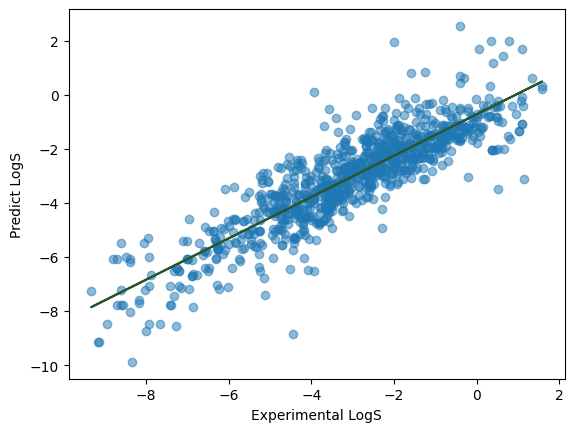

In [65]:
# data visualisation of predicted results

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x = y_train, y = y_lr_train_pred, alpha=0.5)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#27562F')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')

